In [0]:
import unittest 

# Homework
## Linear Data structures:
1. Array
2. Stack
3. Queue:
    - **Circular queue**.
4. Linked list

In [0]:
class Error(Exception):
    pass

class QueueIsFull(Error):
    pass

class QueueIsEmpty(Error):
    pass

class circularQueueFixed:
    """
    Implementation of a fixed size queue using Lists in Python
    """
    def __init__(self, size):
        self.size = size
        self.que = [None]*size
        self._rear = self._front = 0
    
    def isFull(self):
        return (((self._rear + 1) % self.size) == self._front) and not self.isEmpty()
    
    def isEmpty(self):
        return self.getFront() is None
    
    def enqueue(self, item):
        if self.isFull():
            raise QueueIsFull
        elif self.isEmpty():
            self._rear = self._front
            self.que[self._rear] = item
        else:
            self._rear = (self._rear + 1) % self.size
            self.que[self._rear] = item
         
    def dequeue(self):
        if self.isEmpty():
            raise QueueIsEmpty
        else:
            res = self.que[self._front]
            self.que[self._front] = None
            self._front = (self._front + 1) % self.size
        return res
    
    def getFront(self):
        return self.que[self._front]
    
    def getRear(self):
        return self.que[self._rear]
    
    def getState(self):
        return self.que.copy()
    
            
                   

# Data operations:
1. Traversal
2. Insertion
3. Deletion
4. Search
5. Sort
6. Merge

# Algorithms


*   Binary Search



In [0]:
# Binary Search Implementation
# Given a sorted array (asc) and an item.
# returns the index of the item in the array if found otherwise returns None

def BinarySearch(array, item):
    beg = 0
    end = len(array) - 1

    while beg <= end:
        mid = int((beg + end)/2)
        if array[mid] == item:
            return mid
        elif array[mid] < item:
            beg = mid + 1
        else:
            end = mid - 1

In [10]:
# Binary Search Tests
Array = [2, 13, 14, 15, 22, 23, 40, 42, 100]

class test_BinarySearch(unittest.TestCase):
    def test_lefthalf(self):
        self.assertEqual(BinarySearch(Array, 2), 0)
        self.assertEqual(BinarySearch(Array, 13), 1)
        self.assertEqual(BinarySearch(Array, 14), 2)
        self.assertEqual(BinarySearch(Array, 15), 3)

    def test_righthalf(self):
        self.assertEqual(BinarySearch(Array, 22), 4)
        self.assertEqual(BinarySearch(Array, 23), 5)
        self.assertEqual(BinarySearch(Array, 40), 6)
        self.assertEqual(BinarySearch(Array, 42), 7)

    def test_notfound(self):
        self.assertEqual(BinarySearch(Array, 200), None)
        self.assertEqual(BinarySearch(Array, 133), None)
        self.assertEqual(BinarySearch(Array, -42), None)
        self.assertEqual(BinarySearch(Array, 666), None)

unittest.main(argv=[''], verbosity=1, exit=False);


......
----------------------------------------------------------------------
Ran 6 tests in 0.014s

OK


# Pattern Matching
Given a string **S** and a pattern **P** return location/index of the first occuerence of **P** in **S**. 
This is case sensitive: 
- **C is not c**

## Examples:
Assuming 0 indexed strings.
```python
pattern_match(string = "NEDUET", pattern = "ED") # returns 1 
pattern_match(string = "NEDUET", pattern = "ed") # returns None (case sensitive)
pattern_match(string = "NEDUET", pattern = "ZZZZ") # returns None
pattern_match(string = "NEDUET", pattern = "NED") # returns 0
pattern_match(string = "NEDUET", pattern = "T") # returns 5
pattern_match(string = "NEDUET", pattern = "E") # returns 1 (first occurrence)
```

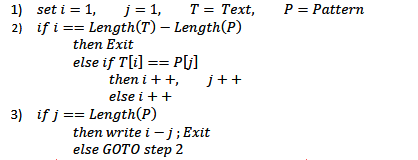

In [0]:
# Pattern Matching Implementation
# Given a pattern and a string
# Algorithm is case sensitive.
# returns index of first occurrence of the beginning of pattern in string

def pattern_match(string, pattern):
    i = j = 0
    while not (i == (len(string) - len(pattern)+1) and j == 0):
        # print(f"i={i} j={j} {string[i]} == {pattern[j]}")
        if string[i] == pattern[j]:
            i += 1
            j += 1
        else:
            i += 1
            j = 0
        if j == len(pattern):
            return i-j    
    return None
        


In [95]:
x = pattern_match("neduet","neduet")
print(x)

0


In [96]:
# Pattern Matching Tests
string1 = "NEDUET!!"
string2 = "AAABBBXXX"
string3 = "neduet"

class test_pattern_match(unittest.TestCase):
    def test_single_occurrence(self):
        self.assertEqual(pattern_match(string1, "ED"), 1)
        self.assertEqual(pattern_match(string1, "NED"), 0)
        self.assertEqual(pattern_match(string1, "UE"), 3)
        self.assertEqual(pattern_match(string1, "ET"), 4)
        self.assertEqual(pattern_match(string3, "neduet"), 0)

    def test_multiple_occurrence(self):
        self.assertEqual(pattern_match(string1, "E"), 1)
        self.assertEqual(pattern_match(string2, "A"), 0)
        self.assertEqual(pattern_match(string2, "AA"), 0)
        self.assertEqual(pattern_match(string2, "B"), 3)
        self.assertEqual(pattern_match(string2, "AB"), 2)
        self.assertEqual(pattern_match(string2, "BX"), 5)

    def test_no_occurrence(self):
        self.assertEqual(pattern_match(string2, "NED"), None)
        self.assertEqual(pattern_match(string2, "ABC"), None)
        self.assertEqual(pattern_match(string1, "ANED"), None)
        self.assertEqual(pattern_match(string1, "ned"), None)
unittest.main(argv=[''], verbosity=2, exit=False);

test_lefthalf (__main__.test_BinarySearch) ... ok
test_notfound (__main__.test_BinarySearch) ... ok
test_righthalf (__main__.test_BinarySearch) ... ok
test_multiple_occurrence (__main__.test_pattern_match) ... ok
test_no_occurrence (__main__.test_pattern_match) ... ok
test_single_occurrence (__main__.test_pattern_match) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.017s

OK
